## **Import Library**

It used for call "help" in our model.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

## **Understanding the Data**

In [2]:
# prompt: gdown from this link https://drive.google.com/file/d/1P56F4oY16p2bsnttZM05F7e-beskBewm/view?usp=share_link

!gdown --id 1P56F4oY16p2bsnttZM05F7e-beskBewm


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1P56F4oY16p2bsnttZM05F7e-beskBewm
To: /content/indonesia-tourism-destination.zip
100% 163k/163k [00:00<00:00, 88.4MB/s]


In [3]:
# prompt: unzip /content/indonesia-tourism-destination.zip using python zipfile

import zipfile

zip_ref = zipfile.ZipFile('indonesia-tourism-destination.zip', 'r')
zip_ref.extractall('content')
zip_ref.close()

In [4]:
# prompt: copy whats in /content/indonesia-tourism-destination to parent folder

!cp -r content/indonesia-tourism-destination/* content/

In [5]:
# Paths to the CSV files
rating_path = 'content/tourism_rating.csv'
id_tourism_path = 'content/tourism_with_id.csv'
adventurer_path = 'content/user.csv'
package_path = 'content/package_tourism.csv'

# Reading the CSV files into DataFrames
rating_df = pd.read_csv(rating_path)
id_tourism_df = pd.read_csv(id_tourism_path)
adventurer_df = pd.read_csv(adventurer_path)
package_df = pd.read_csv(package_path)

Then, display some data in our dataset to understand this structure.

In [6]:
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [7]:
id_tourism_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [8]:
adventurer_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [9]:
package_df.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


Display the number of places and our users (adventurer).

In [10]:
print(f"Number of places: {len(id_tourism_df.Place_Id.unique())}")
print(f"Number of adventurer: {len(adventurer_df.User_Id.unique())}")
print(f"The number of ratings given by the adventurer: {len(rating_df.User_Id)}")

Number of places: 437
Number of adventurer: 300
The number of ratings given by the adventurer: 10000


## **Exploratory Data Analysis**

Display the information for every dataset and check if there is missing data.

In [11]:
print("Information of Tourism with ID dataset")
print(id_tourism_df.info())

Information of Tourism with ID dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None


In [12]:
print("Missing values of Tourism with ID dataset")
print(id_tourism_df.isna().sum())

Missing values of Tourism with ID dataset
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


In [13]:
print("Information of Tourism Rating dataset")
print(rating_df.info())

Information of Tourism Rating dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None


In [14]:
print("Missing values of Tourism Rating dataset")
print(rating_df.isna().sum())

Missing values of Tourism Rating dataset
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


In [15]:
print("Information of Package dataset")
print(package_df.info())

Information of Package dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


In [16]:
print("Missing values of Package dataset")
print(package_df.isna().sum())

Missing values of Package dataset
Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64


In [17]:
print("Information of User dataset")
print(adventurer_df.info())

Information of User dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None


In [18]:
print("Missing values of User dataset")
print(adventurer_df.isna().sum())

Missing values of User dataset
User_Id     0
Location    0
Age         0
dtype: int64


We know that our dataset there is no missing or duplicate. But, we add syntax if the dataset have duplicate or missing data if we have to add dataset soon.

In [19]:
#Delete Duplicate
package_df.drop_duplicates(inplace=True)
rating_df.drop_duplicates(inplace=True)
id_tourism_df.drop_duplicates(inplace=True)
adventurer_df.drop_duplicates(inplace=True)


In [20]:
#Complete or delete the missing data
package_df.fillna('', inplace=True)
rating_df.fillna(rating_df.mean(), inplace=True)
id_tourism_df.fillna('', inplace=True)
adventurer_df.fillna('', inplace=True)

In [21]:
# Look the information after cleaning the data
print("Package Tourism:\n", package_df.info())
print("\nRating of Tourism:\n", rating_df.info())
print("\nID Tourism:\n", id_tourism_df.info())
print("\nAdventurer:\n", adventurer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  100 non-null    object
 6   Place_Tourism5  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
Package Tourism:
 None
<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        9921 non-null   int64
 1   Place_Id       9921 non-null   int64
 2   Place_Ratings  9921 non-null   int64
dtypes: int64(3)
memory usage: 310.0 KB

Rating of Tourism:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

Display unique values in the 'Category' column. It help for our recomendation model content based filtering to help find the similarity between tours.

In [22]:
unique_categories = id_tourism_df['Category'].unique()
unique_categories

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

## **Make a new dataset from merge the two of our dataset**

In [23]:
package_adventrack = np.concatenate((
    id_tourism_df.Place_Id.unique(),
    rating_df.Place_Id.unique()
))

package_adventrack = np.sort(np.unique(package_adventrack))

print(f"Total number of tourism: {len(package_adventrack)}")

Total number of tourism: 437


In [24]:
#Make a rate of our package
package_adventrack_rate = rating_df
package_adventrack_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [25]:
#Merge package adventrack rate dataset with ID Tourism dataset
adventrack = pd.merge(package_adventrack_rate,id_tourism_df[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
adventrack

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [26]:
#Add column of city category from city column + category column
adventrack['city_category'] = adventrack[['City','Category']].agg(' '.join,axis=1)
adventrack

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9916,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9917,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9918,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9919,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


## **Data Preparation Our New Dataset "Adventrack"**

### Missing Values

In [27]:
print("Missing values of Adventrack dataset")
print(adventrack.isnull().sum())

Missing values of Adventrack dataset
User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64


In [28]:
#Delete duplicate of Tourism ID
preparation= adventrack.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
1989,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2378,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2427,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2512,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


### Make a new Dataframe

In [29]:
#Create a list for each required column
place_id = preparation.Place_Id.tolist()
place_name = preparation.Place_Name.tolist()
place_category = preparation.Category.tolist()
place_desc = preparation.Description.tolist()
place_city = preparation.City.tolist()
city_category = preparation.Category.tolist()
user_id = preparation.User_Id.tolist()

In [30]:
#Make a new dataframe
adventrack_new = pd.DataFrame({
    "ID":place_id,
    "Name":place_name,
    "Category":place_category,
    "Description":place_desc,
    "City":place_city,
    "Category":city_category,
    "User":user_id[:len(preparation)] #Make sure user_id like we want
})

adventrack_new

,ID,Name,Category,Description,City,User
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,1
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,1
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,1
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,1
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,1
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,62
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,74
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,75
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,78


## **Modelling Data**

### Modeling with Collaborative Filtering

Data Perposition for model

In [45]:
#Encode user ID and tourist spot ID
adventrack_rating = rating_df
users_ids = adventrack_rating.User_Id.unique().tolist()
users_to_user_encoded = {x:i for i, x in enumerate(users_ids)}
users_encoded_to_user = {i: x for i, x in enumerate(users_ids)}

place_ids = adventrack_rating.Place_Id.unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

adventrack_rating['user'] = adventrack_rating.User_Id.map(users_to_user_encoded)
adventrack_rating['place'] = adventrack_rating.Place_Id.map(place_to_place_encoded)

# Convert ratings to float32 data type
adventrack_rating['Place_Ratings'] = adventrack_rating['Place_Ratings'].values.astype(np.float32)

# Display basic information
num_users = len(users_to_user_encoded)
num_place = len(place_encoded_to_place)
min_rating = min(adventrack_rating['Place_Ratings'])
max_rating= max(adventrack_rating['Place_Ratings'])
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

adv = adventrack_rating.sample(frac=1,random_state=42)
adv

#Split the data
x = adv[['user','place']].values
y = adv['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values
train_indices = int(0.8 * adv.shape[0])
x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:])
print(x,y)

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0
[[160 259]
 [ 16  54]
 [132 240]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 1.   ... 1.   1.   0.5 ]


In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Concatenate, Dense, Input

n_tourisms = len(id_tourism_df)
n_users = len(adventurer_df)

# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')

In [47]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Tourism-Input (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Tourism-Embedding (Embeddi  (None, 1, 5)                 2190      ['Tourism-Input[0][0]']       
 ng)                                                                                              
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 1505      ['User-Input[0][0]']    

In [48]:
# split the data by train_indices

train = adv[:train_indices]
test = adv[train_indices:]

In [49]:
history = model.fit([train.user, train.place], train.Place_Ratings, epochs=20, verbose=1)

Epoch 1/20
248/248 [==============================] - 2s 2ms/step - loss: 3.1920
Epoch 2/20
248/248 [==============================] - 0s 2ms/step - loss: 1.8451
Epoch 3/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7970
Epoch 4/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7755
Epoch 5/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7621
Epoch 6/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7562
Epoch 7/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7527
Epoch 8/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7496
Epoch 9/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7426
Epoch 10/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7430
Epoch 11/20
248/248 [==============================] - 0s 2ms/step - loss: 1.7233
Epoch 12/20
248/248 [==============================] - 1s 2ms/step - loss: 1.6912
Epoch 13/20
248/248 [====

Text(0, 0.5, 'Training Error')

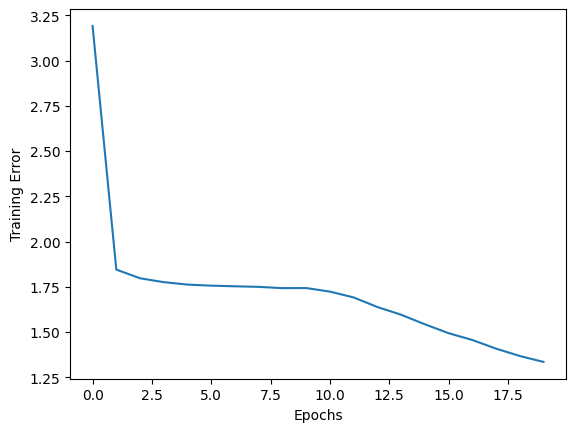

In [53]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [54]:
model.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

63/63 [==============================] - 0s 3ms/step - loss: 2.3823


2.3823323249816895

In [55]:
id_place = range(1,20)
id_user = 3

# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(id_tourism_df.Place_Id)))


# get place data
id_tourism_df[id_tourism_df['Place_Id'].isin(tourism_data)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,,436


In [56]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

# Get the names of the recommended tourism
recommended_tourism = id_tourism_df[id_tourism_df['Place_Id'].isin(recommended_tourism_ids)]
recommended_tourism

14/14 [==============================] - 0s 1ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
72,73,Museum Perangko,Museum perangko dibangun dengan bentuk banguna...,Budaya,Jakarta,5000,4.4,,"{'lat': -6.304184100000001, 'lng': 106.9017725}",-6.304184,106.901773,,73
77,78,Hutan Kota Srengseng,Selain Taman Hutan Mangrove dan Pantai Indah K...,Taman Hiburan,Jakarta,1000,4.3,,"{'lat': -6.210694499999999, 'lng': 106.7643954}",-6.210694,106.764395,,78
93,94,Sumur Gumuling,Sumur Gumuling adalah salah satu tempat untuk ...,Taman Hiburan,Yogyakarta,7000,4.5,,"{'lat': -7.808791100000001, 'lng': 110.3591825}",-7.808791,110.359183,,94
125,126,Pantai Goa Cemara,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Bahari,Yogyakarta,4000,4.3,,"{'lat': -7.999422999999998, 'lng': 110.248963}",-7.999423,110.248963,,126
234,235,Gua Belanda,Gua Belanda Bandung merupakan sebuah gua yang ...,Cagar Alam,Bandung,15000,4.4,45.0,"{'lat': -6.8544594, 'lng': 107.6377907}",-6.854459,107.637791,,235
277,278,Masjid Daarut Tauhiid Bandung,pada bulan Juli 1993 berdirilah sebuah masjid ...,Tempat Ibadah,Bandung,0,4.9,,"{'lat': -6.863526999999999, 'lng': 107.5899194}",-6.863527,107.589919,,278
293,294,Taman Film,Taman Film adalah salah satu taman tematik dan...,Budaya,Bandung,0,4.3,90.0,"{'lat': -6.8986869, 'lng': 107.6077451}",-6.898687,107.607745,,294
301,302,Masjid Pusdai,Masjid PUSDAI (pusat dakwah islam) dibangun da...,Tempat Ibadah,Bandung,0,4.7,,"{'lat': -6.9000672, 'lng': 107.62587}",-6.900067,107.625870,,302
406,407,Taman Ekspresi Dan Perpustakaan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Taman Hiburan,Surabaya,0,4.5,45.0,"{'lat': -7.2573072, 'lng': 112.7437199}",-7.257307,112.743720,,407
428,429,House of Sampoerna,House of Sampoerna adalah sebuah museum tembak...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.230817300000001, 'lng': 112.7342344}",-7.230817,112.734234,,429


In [57]:
(-predictions).argsort()[:10]

array([407, 429,  78, 294, 126, 278,  94, 235, 302,  73])

In [58]:
# Save model architecture as JSON
model1_json = model.to_json()
with open("model1.json", "w") as json_file:
  json_file.write(model1_json)

# Save model weights
model.save_weights("model1.weights.h5")

# Combine model architecture and weights
model_data = {
    "model1_json": model1_json,
    "model1_weights": "model1.h5"}

# Save combined model data as .pkl
with open("model1.pkl", "wb") as pkl_file:
  pickle.dump(model_data, pkl_file)

  print("Model saved as .pkl format.")

Model saved as .pkl format.


In [60]:
import tensorflow as tf
# Create a TFLite converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open("converted_model1.tflite", "wb") as f:
  f.write(tflite_model)

# Modelling with Content Based Filtering

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [62]:
# Assume df is already created and has columns 'Place_Name', 'Description', and 'Features'
df = id_tourism_df.copy()

# Combine textual fields to create the "Features" column
df['Features'] = df['Place_Name'] + " " + df['Description'] + " " + df['Category'] + " " + df['City']

df[['Place_Name', 'Features']]

,Place_Name,Features
0,Monumen Nasional,Monumen Nasional Monumen Nasional atau yang po...
1,Kota Tua,"Kota Tua Kota tua di Jakarta, yang juga bernam..."
2,Dunia Fantasi,Dunia Fantasi Dunia Fantasi atau disebut juga ...
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah (TMII) Taman Mini I...
4,Atlantis Water Adventure,Atlantis Water Adventure Atlantis Water Advent...
...,...,...
432,Museum Mpu Tantular,Museum Mpu Tantular Museum Negeri Mpu Tantular...
433,Taman Bungkul,Taman Bungkul Taman Bungkul adalah taman wisat...
434,Taman Air Mancur Menari Kenjeran,Taman Air Mancur Menari Kenjeran Air mancur me...
435,Taman Flora Bratang Surabaya,Taman Flora Bratang Surabaya Taman Flora adala...


In [63]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Features'])
sequences = tokenizer.texts_to_sequences(df['Features'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Place_Name'])
num_classes = len(label_encoder.classes_)
categorical_labels = to_categorical(labels, num_classes=num_classes)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(num_classes, activation='softmax')  # Make sure this matches num_classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           80000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_9 (Dense)             (None, 24)                408       
                                                                 
 dense_10 (Dense)            (None, 437)               10925     
                                                                 
Total params: 91333 (356.77 KB)
Trainable params: 91333 (356.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.fit(padded, categorical_labels, epochs=200, verbose=1)


Epoch 1/200
14/14 [==============================] - 1s 3ms/step - loss: 6.0829 - accuracy: 0.0000e+00
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0796 - accuracy: 0.0023
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0782 - accuracy: 0.0092
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0759 - accuracy: 0.0114
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0723 - accuracy: 0.0160
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0665 - accuracy: 0.0183
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0573 - accuracy: 0.0160
Epoch 8/200
14/14 [==============================] - 0s 4ms/step - loss: 6.0431 - accuracy: 0.0137
Epoch 9/200
14/14 [==============================] - 0s 5ms/step - loss: 6.0215 - accuracy: 0.0183
Epoch 10/200
14/14 [==============================] - 0s 5ms/step - loss: 5.9918 - accuracy: 0.0137
Epoch

In [66]:
# Function to preprocess the input text
def preprocess_text(text, tokenizer, max_length=100):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    return padded

# Example input text (features of a place)
input_text = "Monumen Nasional Monumen Nasional atau yang populer disingkat dengan Monas atau Tugu Monas adalah monumen peringatan setinggi 132 meter (433 kaki) yang didirikan untuk mengenang perlawanan dan perjuangan rakyat Indonesia untuk merebut kemerdekaan dari pemerintahan kolonial Hindia Belanda. Pembangunan monumen ini dimulai pada tanggal 17 Agustus 1961 di bawah perintah presiden Soekarno dan dibuka untuk umum pada tanggal 12 Juli 1975. Tugu ini dimahkotai lidah api yang dilapisi lembaran emas yang melambangkan semangat perjuangan yang menyala-nyala. Monumen Nasional terletak tepat di tengah Lapangan Medan Merdeka, Jakarta Pusat. Budaya Jakarta"
preprocessed_input = preprocess_text(input_text, tokenizer)

# Make predictions
predictions = model.predict(preprocessed_input)

# Get the indices of the top 10 probabilities
top_10_indices = np.argsort(predictions[0])[-10:][::-1]

# Map the top 10 indices back to place names
top_10_place_names = label_encoder.inverse_transform(top_10_indices)

print(f"Top 10 Recommended Places: {top_10_place_names}")

# Get the IDs for the top 10 place names
top_10_place_ids = df.loc[df['Place_Name'].isin(top_10_place_names), 'Place_Id'].values

print(f"Top 10 Recommended Places: {list(zip(top_10_place_ids, top_10_place_names))}")

1/1 [==============================] - 0s 91ms/step
Top 10 Recommended Places: ['Monumen Nasional' 'Puspa Iptek Sundial' 'Curug Batu Templek'
 'Farm House Susu Lembang' 'Museum Sri Baduga' 'Trans Studio Bandung'
 'Curug Cimahi' 'Old City 3D Trick Art Museum' 'Masjid Istiqlal'
 'Gunung Manglayang']
Top 10 Recommended Places: [(1, 'Monumen Nasional'), (22, 'Puspa Iptek Sundial'), (214, 'Curug Batu Templek'), (216, 'Farm House Susu Lembang'), (228, 'Museum Sri Baduga'), (238, 'Trans Studio Bandung'), (263, 'Curug Cimahi'), (287, 'Old City 3D Trick Art Museum'), (317, 'Masjid Istiqlal'), (351, 'Gunung Manglayang')]


In [67]:
model.save("model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
# Save model architecture as JSON
model2_json = model.to_json()
with open("model2.json", "w") as json_file:
  json_file.write(model2_json)

# Save model weights
model.save_weights("model2.weights.h5")

# Combine model architecture and weights
model_data = {
    "model2_json": model2_json,
    "model2_weights": "model2.h5"}

# Save combined model data as .pkl
with open("model2.pkl", "wb") as pkl_file:
  pickle.dump(model_data, pkl_file)

print("Model saved as .pkl format.")

Model saved as .pkl format.


In [69]:
import tensorflow as tf

# Create a TFLite converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save the converted model
with open("converted_model2.tflite", "wb") as f:
  f.write(tflite_model)
